# MATPLOTLIB: BOX PLOTS

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filtering for DA roles

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

c:\Users\Pham Duc Toan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. Filter location and drop Nan values

In [21]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short']=="Data Analyst")&(df['job_country']=="United States")].copy()
# Drop NaN Values from the column for plotting
df_DA_US = df_DA_US.dropna(subset= ['salary_year_avg'])

df_DA_US.head(10)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.00,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.00,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.00,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.00,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.00,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
1587,Data Analyst,Sr Data Analyst,"Long Beach, CA",via Indeed,Full-time,False,"California, United States",2023-02-16 13:00:47,False,True,United States,year,89111.75,NaN,Molina Healthcare,[excel],{'analyst_tools': ['excel']}
1681,Data Analyst,Data Analyst,"Irvine, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-03-23 13:01:14,False,True,United States,year,111175.00,NaN,Western Digital,"[sql, tableau, power bi, excel]","{'analyst_tools': ['tableau', 'power bi', 'exc..."
1684,Data Analyst,Data Analyst - Data17829,"Tampa, FL",via Indeed,Full-time,False,"Florida, United States",2023-07-18 13:02:09,True,True,United States,year,120000.00,NaN,Acrisure,"[shell, sql, azure, databricks, linux]","{'cloud': ['azure', 'databricks'], 'os': ['lin..."
1867,Data Analyst,Data Integration Analyst (West Coast/Chicago),"Chicago, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-07-18 13:01:47,False,False,United States,year,101500.00,NaN,Forsta,"[php, python, express]","{'programming': ['php', 'python'], 'webframewo..."
2401,Data Analyst,Data Analytics- Auto Intern,"Dublin, CA",via LinkedIn,Internship,False,"California, United States",2023-12-27 13:01:14,False,False,United States,year,35000.00,NaN,Epicor,[go],{'programming': ['go']}


2. Create a box plot using Matplotlib 

{'whiskers': [<matplotlib.lines.Line2D at 0x1f50e0e5890>,
 'caps': [<matplotlib.lines.Line2D at 0x1f53fc4d590>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f50dff9750>],
 'medians': [<matplotlib.lines.Line2D at 0x1f53fc4e9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f53fc4f290>],
 'means': []}

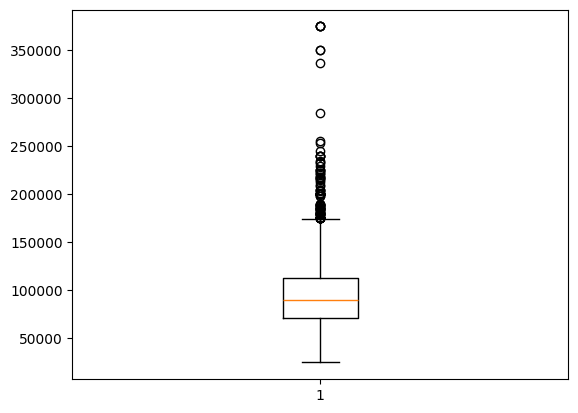

In [5]:
plt.boxplot(df_DA_US['salary_year_avg']) 

3. Create a box plot using Pandas

<Axes: >

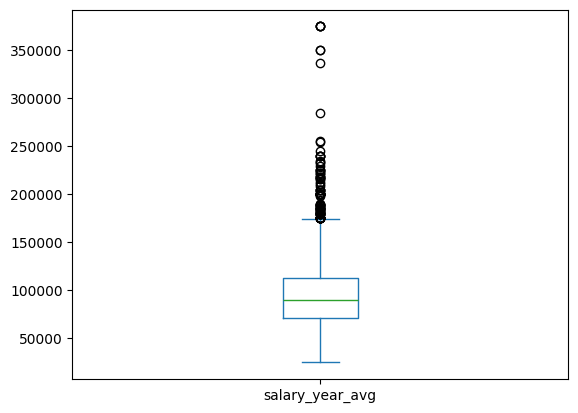

In [7]:
df_DA_US['salary_year_avg'].plot(kind= 'box')

4. Change the direction of the box plot (vertical to horizontal)

<Axes: >

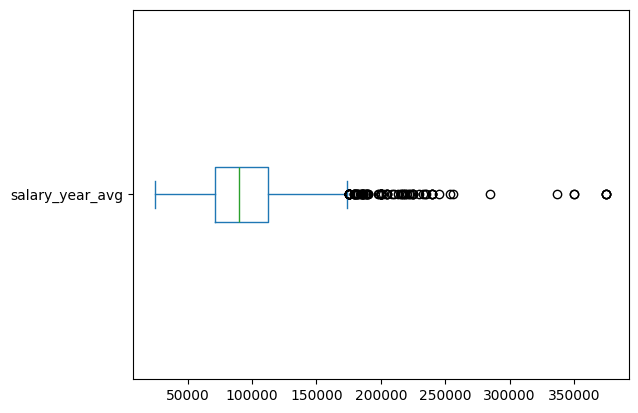

In [8]:
df_DA_US['salary_year_avg'].plot(kind= 'box', vert=False)

5. Compare yearly salary of 3 different roles using box plots

C:\Users\Pham Duc Toan\AppData\Local\Temp\ipykernel_536\3661543387.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_df_list, labels= job_titles, vert=False,)


Text(0.5, 0, 'Yearly Salary ($USD)')

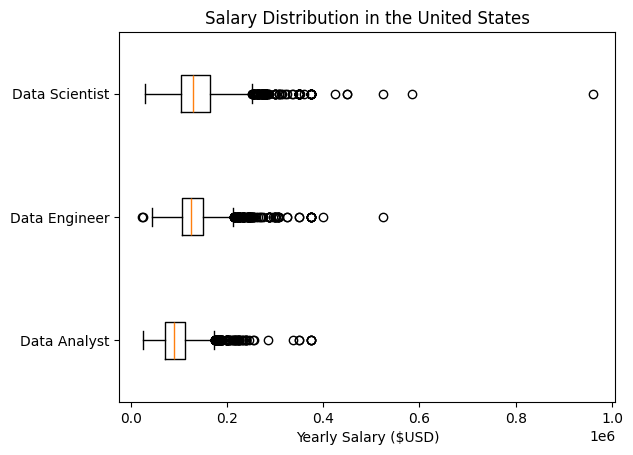

In [14]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter data to appropriate the job titles 
# only jobs in the US
df_US = df[
    (df['job_title_short'].isin(job_titles)) & # df.series.isin() filter only 3 jobs in the list
    (df['job_country'] == 'United States')
    ].copy()

# drop NaN values
df_US = df_US.dropna(subset=['salary_year_avg'])

# list comprehesion
job_df_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

# create the box plot
plt.boxplot(job_df_list, labels= job_titles, vert=False,) 
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')


6. Format the x-axis

C:\Users\Pham Duc Toan\AppData\Local\Temp\ipykernel_536\3213377751.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_df_list, labels= job_titles, vert=False,)


(0.0, 600000.0)

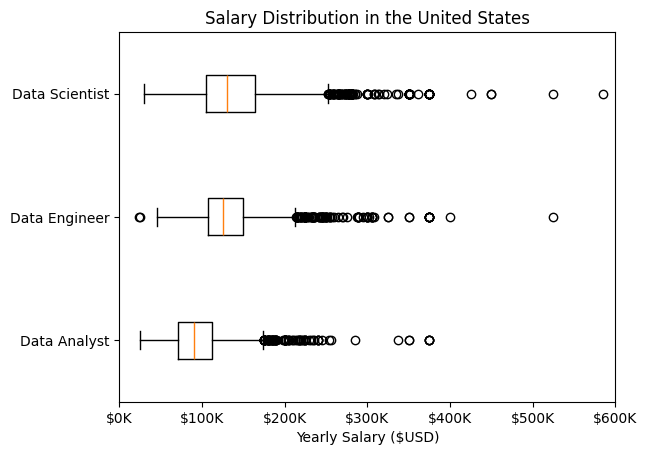

In [20]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter data to appropriate the job titles 
# only jobs in the US
df_US = df[
    (df['job_title_short'].isin(job_titles)) & # df.series.isin() filter only 3 jobs in the list
    (df['job_country'] == 'United States')
    ].copy()

# drop NaN values
df_US = df_US.dropna(subset=['salary_year_avg'])

# list comprehesion
job_df_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

# create the box plot
plt.boxplot(job_df_list, labels= job_titles, vert=False,) 
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')

# get the current ax a.k.a the current plot
ax = plt.gca()

# format the major tick label
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

# set the limit value of the x-axis
ax.set_xlim(0,600000)

7. Add details to the first basic box plot 

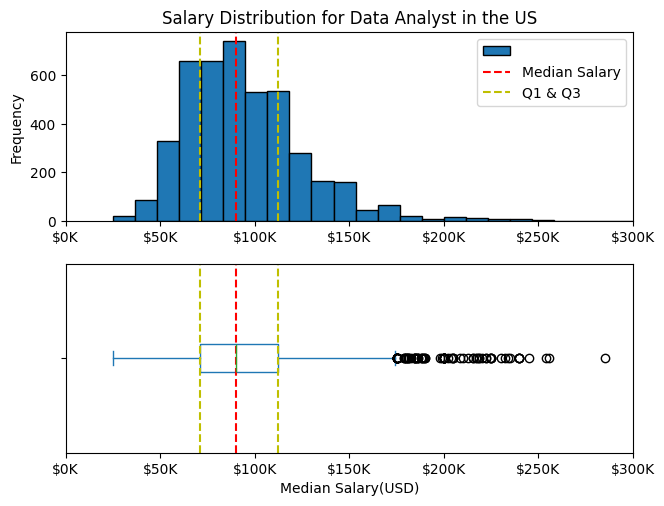

In [30]:
# plot histogram and boxplot for df_DA_US['salary_year_avg'] on the first box plot

fig,ax = plt.subplots(2,1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(
    kind='hist',
    ax=ax[0],
    bins = 30,
    edgecolor = 'black'
    )
ax[0].set_title('Salary Distribution for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].set_xlim(0,300000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
# add dotted lines
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r',linestyle= '--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y',linestyle= '--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y',linestyle= '--')
ax[0].legend(['','Median Salary', 'Q1 & Q3'])



df_DA_US['salary_year_avg'].plot(
    kind='box',
    ax= ax[1],
    vert=False
)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary(USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(0,300000)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
# add dotted lines
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r',linestyle= '--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y',linestyle= '--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y',linestyle= '--')

# 
